In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/qhtoqyhiua/audio_file'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_23.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_05.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_04.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_25.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_31.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_29.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_17.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_20.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_07.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_34.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_27.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_32.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_15.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_03.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_33.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_10.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_35.wav
/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_13.wav
/kaggle/in

# Importing some important library

In [2]:

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential,Model
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import IPython.display as ipd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback,EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense,GlobalAveragePooling2D, Dropout

print("Library imported successfully")

2024-02-29 20:25:05.075643: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 20:25:05.075832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 20:25:05.252543: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Library imported successfully


In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[0]
        label = label.split('.')[0]
#         label = filename.split('_')[1]
        labels.append(label.lower())
    if len(paths) == 130:
        break
print('Dataset is Loaded successfullly')

Dataset is Loaded successfullly


In [4]:
len(paths)

130

In [5]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head().style.set_properties(**{'background-color':'Olive','color':'black','border-color':'#8b8c8c'})

,speech,label
0,/kaggle/input/ayub-data-set/audio_file/zunuu/zunuu_23.wav,zunuu
1,/kaggle/input/ayub-data-set/audio_file/zunuu/zunuu_05.wav,zunuu
2,/kaggle/input/ayub-data-set/audio_file/zunuu/zunuu_04.wav,zunuu
3,/kaggle/input/ayub-data-set/audio_file/zunuu/zunuu_25.wav,zunuu
4,/kaggle/input/ayub-data-set/audio_file/zunuu/zunuu_31.wav,zunuu


In [6]:
df.tail(5)

,speech,label
125,/kaggle/input/ayub-data-set/audio_file/Ayub/Ay...,ayub
126,/kaggle/input/ayub-data-set/audio_file/Ayub/Ay...,ayub
127,/kaggle/input/ayub-data-set/audio_file/Ayub/Ay...,ayub
128,/kaggle/input/ayub-data-set/audio_file/Ayub/Ay...,ayub
129,/kaggle/input/ayub-data-set/audio_file/Ayub/Ay...,ayub


In [7]:
df

,speech,label
0,/kaggle/input/ayub-data-set/audio_file/zunuu/z...,zunuu
1,/kaggle/input/ayub-data-set/audio_file/zunuu/z...,zunuu
2,/kaggle/input/ayub-data-set/audio_file/zunuu/z...,zunuu
3,/kaggle/input/ayub-data-set/audio_file/zunuu/z...,zunuu
4,/kaggle/input/ayub-data-set/audio_file/zunuu/z...,zunuu
...,...,...
125,/kaggle/input/ayub-data-set/audio_file/Ayub/Ay...,ayub
126,/kaggle/input/ayub-data-set/audio_file/Ayub/Ay...,ayub
127,/kaggle/input/ayub-data-set/audio_file/Ayub/Ay...,ayub
128,/kaggle/input/ayub-data-set/audio_file/Ayub/Ay...,ayub


In [8]:
df['label'].value_counts()

label
ayub     95
zunuu    35
Name: count, dtype: int64

In [9]:
df['label'] = df['label'].astype('category')

In [10]:
df['label']

0      zunuu
1      zunuu
2      zunuu
3      zunuu
4      zunuu
       ...  
125     ayub
126     ayub
127     ayub
128     ayub
129     ayub
Name: label, Length: 130, dtype: category
Categories (2, object): ['ayub', 'zunuu']

In [11]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Convert the labels to numerical values
df['labels_encoded'] = label_encoder.fit_transform(df['label'])

In [12]:
df['labels_encoded']

0      1
1      1
2      1
3      1
4      1
      ..
125    0
126    0
127    0
128    0
129    0
Name: labels_encoded, Length: 130, dtype: int64

<Axes: ylabel='count'>

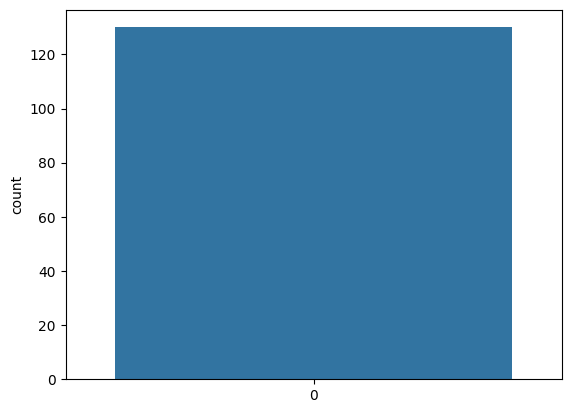

In [13]:
sns.countplot(df['labels_encoded'])

In [14]:
one_hot_encoded = pd.get_dummies(df['label'])
one_hot_encoded

,ayub,zunuu
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
125,True,False
126,True,False
127,True,False
128,True,False


<Axes: ylabel='count'>

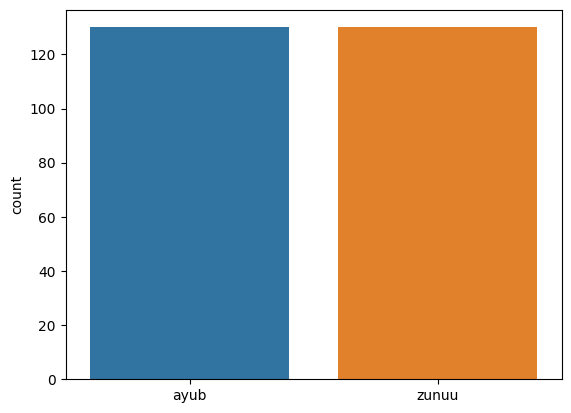

In [15]:
sns.countplot(one_hot_encoded)

In [16]:
df

,speech,label,labels_encoded
0,/kaggle/input/ayub-data-set/audio_file/zunuu/z...,zunuu,1
1,/kaggle/input/ayub-data-set/audio_file/zunuu/z...,zunuu,1
2,/kaggle/input/ayub-data-set/audio_file/zunuu/z...,zunuu,1
3,/kaggle/input/ayub-data-set/audio_file/zunuu/z...,zunuu,1
4,/kaggle/input/ayub-data-set/audio_file/zunuu/z...,zunuu,1
...,...,...,...
125,/kaggle/input/ayub-data-set/audio_file/Ayub/Ay...,ayub,0
126,/kaggle/input/ayub-data-set/audio_file/Ayub/Ay...,ayub,0
127,/kaggle/input/ayub-data-set/audio_file/Ayub/Ay...,ayub,0
128,/kaggle/input/ayub-data-set/audio_file/Ayub/Ay...,ayub,0


In [18]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

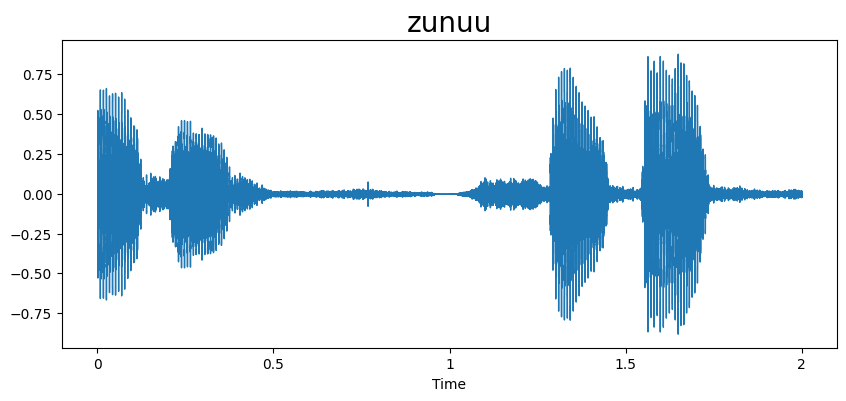

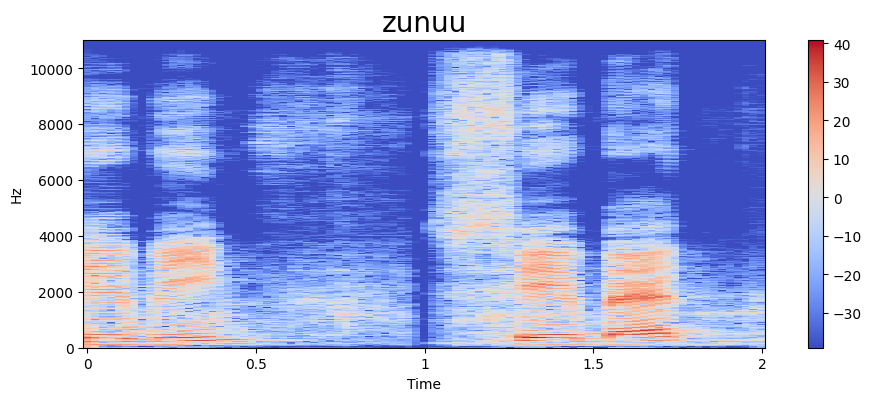

In [19]:
emotion='zunuu'
path=np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

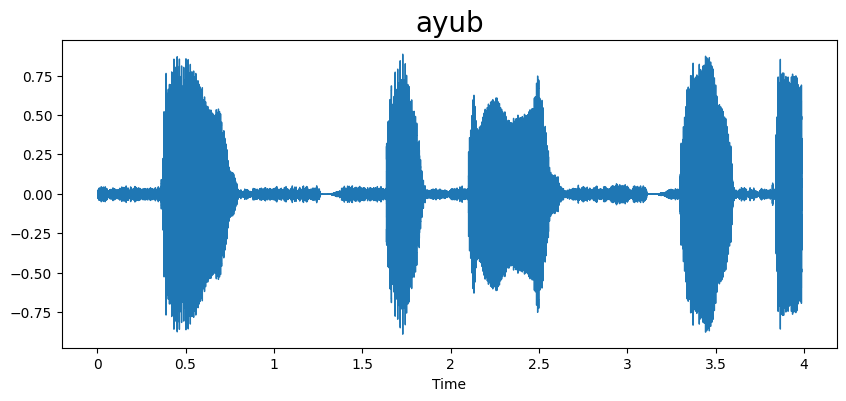

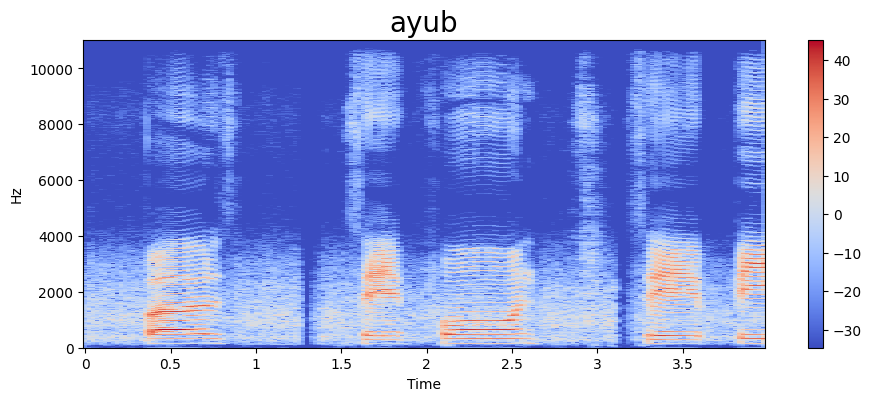

In [20]:
emotion = 'ayub'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [21]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [22]:
extract_mfcc(df['speech'][0])

array([-3.2099814e+02,  1.4359479e+02, -3.9938290e+01, -7.3478227e+00,
        1.8554041e+01, -2.1229576e+01, -1.2298271e+01, -8.8684416e+00,
       -1.8114376e+01,  2.9884646e+00, -1.5905422e+01, -3.9125206e+00,
       -4.4007640e+00,  2.1425066e+00, -6.8410659e+00, -1.7093593e+00,
       -2.8199878e+00, -7.4492102e+00, -2.4695210e+00, -5.5998077e+00,
       -5.7811093e+00, -3.1278343e+00, -3.0193405e+00, -5.4299593e+00,
       -7.3037577e+00, -5.2146692e+00, -5.6400876e+00, -5.3933841e-01,
       -3.9700749e+00, -1.7508535e+00,  1.4900364e+00, -1.3470341e+00,
       -1.1996410e+00, -4.1931219e+00, -2.1457225e-01, -6.2174892e+00,
       -2.1787674e+00, -2.6054382e+00, -3.4258332e+00, -3.5037818e+00],
      dtype=float32)

In [23]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [24]:
X_mfcc

0      [-320.99814, 143.59479, -39.93829, -7.3478227,...
1      [-268.65915, 100.910995, -36.558807, -9.862816...
2      [-357.3972, 102.20971, -30.482437, -17.702618,...
3      [-275.04498, 122.31489, -33.703243, -7.674613,...
4      [-234.2928, 146.84082, -51.97134, -18.339783, ...
                             ...                        
125    [-261.56085, 116.552055, -60.56997, -13.051813...
126    [-248.85538, 118.71769, -77.49471, -4.1180563,...
127    [-239.11745, 101.60905, -49.387844, -15.948155...
128    [-236.44447, 130.6278, -84.27547, -15.461472, ...
129    [-289.4339, 113.86659, -60.726765, -21.679775,...
Name: speech, Length: 130, dtype: object

In [49]:
X = [x for x in X_mfcc]
X = np.array(X) 
X.shape

(130, 40)

In [26]:
# X = np.expand_dims(X, -1)
# X.shape

(130, 40, 1)

In [108]:
from keras.utils import to_categorical
y=to_categorical(df['labels_encoded'])
y.shape

(130, 2)

In [109]:
# y=df['labels_encoded']
# y = np.array(y.tolist())

In [110]:
# le = LabelEncoder()
# y = to_categorical(le.fit_transform(y))
# y.shape

In [111]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [162]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display

# audio plot 
from scipy.io import wavfile as wav
import IPython.display as ipd

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import Callback,EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense,GlobalAveragePooling2D, Dropout

In [163]:
model = Sequential()
model.add(Dense(64, input_dim=40,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 46)             │         2,990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 46)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         1,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,184 (28.06 KB)

 Trainable params: 7,184 (28.06 KB)

 Non-trainable params: 0 (0.00 B)

In [164]:
earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')

In [167]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),  epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8231 - loss: 1.2090 - val_accuracy: 0.9231 - val_loss: 0.3887
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7405 - loss: 2.0056 - val_accuracy: 0.8846 - val_loss: 0.4923
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7962 - loss: 1.1943 - val_accuracy: 0.8846 - val_loss: 0.5818
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8471 - loss: 0.9982 - val_accuracy: 0.8846 - val_loss: 0.4885
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8239 - loss: 1.2184 - val_accuracy: 0.9615 - val_loss: 0.3774
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8385 - loss: 0.7793 - val_accuracy: 0.9615 - val_loss: 0.3306
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8141 - loss: 0.8942 - val_accuracy: 0.9231 - val_loss: 0.3460
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8781 - loss: 0.7080 - val_accuracy: 0.8846 - val_loss:

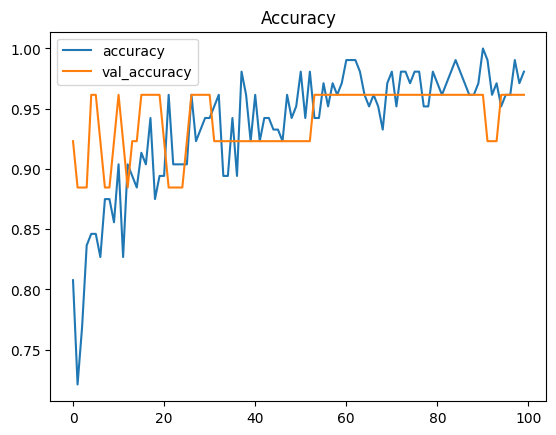

In [168]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

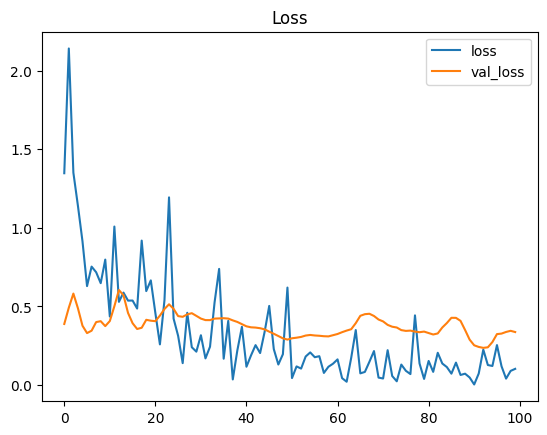

In [169]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [170]:
model.save('Emotions_Classification.h5')

In [171]:
# Evaluating The Model
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy:\033[01m {0:.2%}\033[0m".format(score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy:\033[01m {0:.2%}\033[0m".format(score[1]))

Training Accuracy: 99.04%
Testing Accuracy: 96.15%


In [172]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [2]:
import tensorflow as tf

# Assuming 'model_path' is the path to your saved model
model1= tf.keras.models.load_model('/kaggle/input/new-model/Emotions_Classification.h5')


In [12]:

train_labels = ["ayub","zunuu"]
import tensorflow as tf
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the model
model1 = tf.keras.models.load_model('/kaggle/input/new-model/Emotions_Classification.h5')

# Define and fit the LabelEncoder
le = LabelEncoder()
# Assuming train_labels is your training labels
le.fit(train_labels)

def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

def prediction_(path_sound):
    data_sound = extract_mfcc(path_sound)
    X = np.array(data_sound)
    X = X.reshape(1,40)
    pred_ = model1.predict(X)
    pred_ = np.argmax(pred_,axis=1)
    pred_class = le.inverse_transform(pred_)
    print("The predicted class is:\033[01m ", pred_class[0],'\033[0m \n')
    

path_sound ='/kaggle/input/qhtoqyhiua/audio_file/Ayub/Ayub_02.wav'
prediction_(path_sound)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
The predicted class is:  ayub  



In [24]:
train_labels = ["ayub", "zunnu"]
import tensorflow as tf
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the model
model1 = tf.keras.models.load_model('/kaggle/input/new-model/Emotions_Classification.h5')

# Define and fit the LabelEncoder
le = LabelEncoder()
# Assuming train_labels is your training labels
le.fit(train_labels)

def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

def prediction_(path_sound, threshold=0.5):
    data_sound = extract_mfcc(path_sound)
    X = np.array(data_sound)
    X = X.reshape(1, 40)
    pred_ = model1.predict(X)
    pred_confidence = np.max(pred_)
    if pred_confidence >= threshold:
        pred_class_idx = np.argmax(pred_)
        pred_class = le.inverse_transform([pred_class_idx])[0]
        print("The predicted class is:\033[01m ", pred_class, "\033[0m with confidence:", pred_confidence)
    else:
        print("The input does not belong to any class with confidence:", pred_confidence)

path_sound = '/kaggle/input/unseen-dataset/ayan.wav'
prediction_(path_sound)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
The predicted class is:  zunnu  with confidence: 0.9996356


# model is tested when you provide the audio as input it will throw your image 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


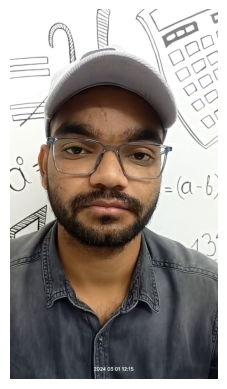

The predicted class is:  zunnu  



In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_labels = ["ayub", "zunnu"]
class_names = {0: "/kaggle/input/frame-data/Ayub_000.jpg", 1: "/kaggle/input/frame-data/zunnu_012.jpg"}  # Mapping class index to class name

import tensorflow as tf
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the model
model1 = tf.keras.models.load_model('/kaggle/input/new-model/Emotions_Classification.h5')

# Define and fit the LabelEncoder
le = LabelEncoder()
# Assuming train_labels is your training labels
le.fit(train_labels)

def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

def prediction_(path_sound):
    data_sound = extract_mfcc(path_sound)
    X = np.array(data_sound)
    X = X.reshape(1, 40)
    pred_ = model1.predict(X)
    pred_ = np.argmax(pred_, axis=1)
#     pred_ = np.argmax(pred_,axis=1)
    pred_class = le.inverse_transform(pred_)
    
    pred_class1 = class_names[pred_[0]]
    img = mpimg.imread(pred_class1)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print("The predicted class is:\033[01m ", pred_class[0], '\033[0m \n')

path_sound = '/kaggle/input/qhtoqyhiua/audio_file/zunuu/zunuu_01.wav'
prediction_(path_sound)
